In [14]:
import pandas as pd

# Assuming you have the dataset stored in a CSV file named 'traffic_data.csv'
dataset_path = r'C:\Users\avisa\OneDrive\Desktop\Daily Tasks for LINKEDIN\task-10\Traffic.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Display the columns
print("Columns:")
print(df.columns)

# Display the first few rows
print("\nFirst Few Rows:")
print(df.head())


Columns:
Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

First Few Rows:
          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  


In [22]:
import warnings
# Suppress FutureWarning related to is_sparse
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'\nModel Accuracy: {accuracy * 100:.2f}%')



Model Accuracy: 93.62%


In [21]:
import warnings
# Suppress FutureWarning related to is_sparse
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming you have a function to get real-time traffic data
def get_real_time_features():
    # Replace this with actual data retrieval logic
    current_time = datetime.now().strftime('%I:%M:%S %p')
    current_date = datetime.now().day
    current_day_of_week = datetime.now().strftime('%A')
    car_count = random.randint(20, 50)
    bike_count = random.randint(0, 10)
    bus_count = random.randint(1, 15)
    truck_count = random.randint(1, 10)

    return current_time, current_date, current_day_of_week, car_count, bike_count, bus_count, truck_count

def predict_traffic_congestion(model, time, date, day_of_week, car_count, bike_count, bus_count, truck_count):
    input_features = pd.DataFrame({
        'Hour': [pd.to_datetime(time, format='%I:%M:%S %p').hour],
        'Minute': [pd.to_datetime(time, format='%I:%M:%S %p').minute],
        'Date': [date],
        'Day of the week': [day_of_week],
        'CarCount': [car_count],
        'BikeCount': [bike_count],
        'BusCount': [bus_count],
        'TruckCount': [truck_count]
    })

    # Convert categorical variables to numerical using one-hot encoding
    input_features = pd.get_dummies(input_features, columns=['Day of the week'])

    # Ensure all possible day of the week columns are present
    missing_cols = set(X.columns) - set(input_features.columns)
    for col in missing_cols:
        input_features[col] = 0

    # Reorder columns to match the order during training
    input_features = input_features[X.columns]

    congestion_prediction = model.predict(input_features)[0]
    return congestion_prediction


# Get real-time features
current_time, current_date, current_day_of_week, car_count, bike_count, bus_count, truck_count = get_real_time_features()

# Use the trained model to predict traffic congestion
predicted_congestion = predict_traffic_congestion(model, current_time, current_date, current_day_of_week, car_count, bike_count, bus_count, truck_count)

# Integrate with other modules (simplified example)
if predicted_congestion == 'low':
    print("\nTraffic is predicted to be low. Normal operations.")
elif predicted_congestion == 'normal':
    print("Traffic is predicted to be normal. Normal operations.")
else:
    print("Traffic is predicted to be high or heavy. Consider alternative routes.")
    # Implement routing algorithms, incident detection, etc. based on the prediction



Traffic is predicted to be low. Normal operations.


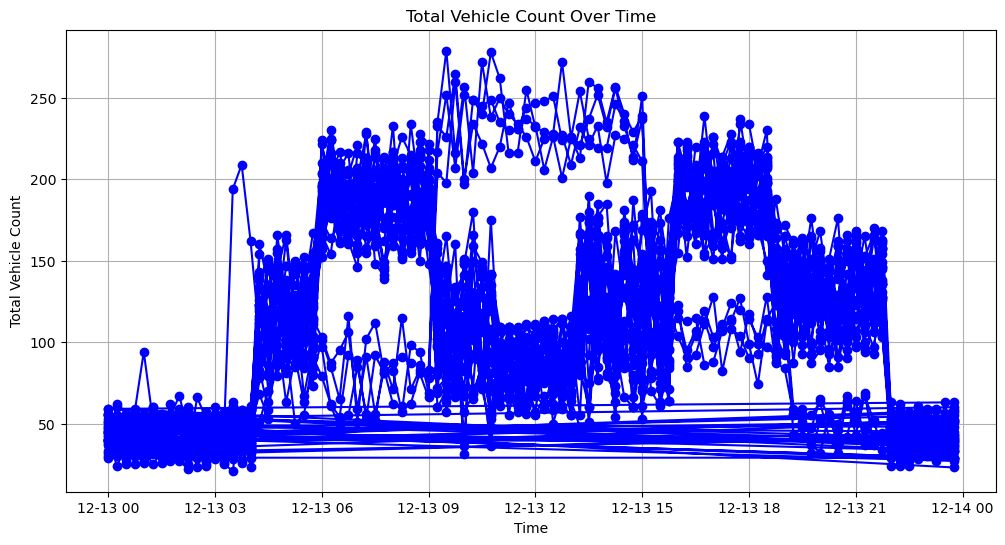

In [24]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, message="Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.")
df['Time'] = pd.to_datetime(df['Time'])

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the traffic data
plt.figure(figsize=(12, 6))
df['Time'] = pd.to_datetime(df['Time'])
plt.plot(df['Time'], df['Total'], marker='o', linestyle='-', color='b')
plt.title('Total Vehicle Count Over Time')
plt.xlabel('Time')
plt.ylabel('Total Vehicle Count')
plt.grid(True)
plt.show()


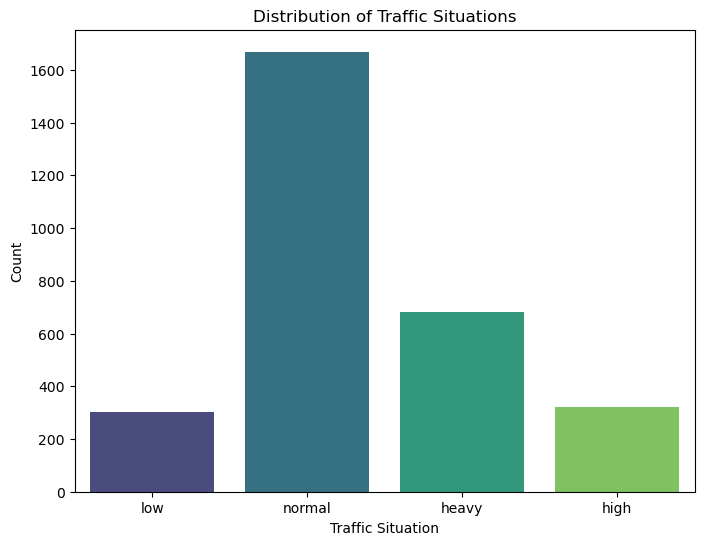

In [25]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df, palette='viridis')
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()


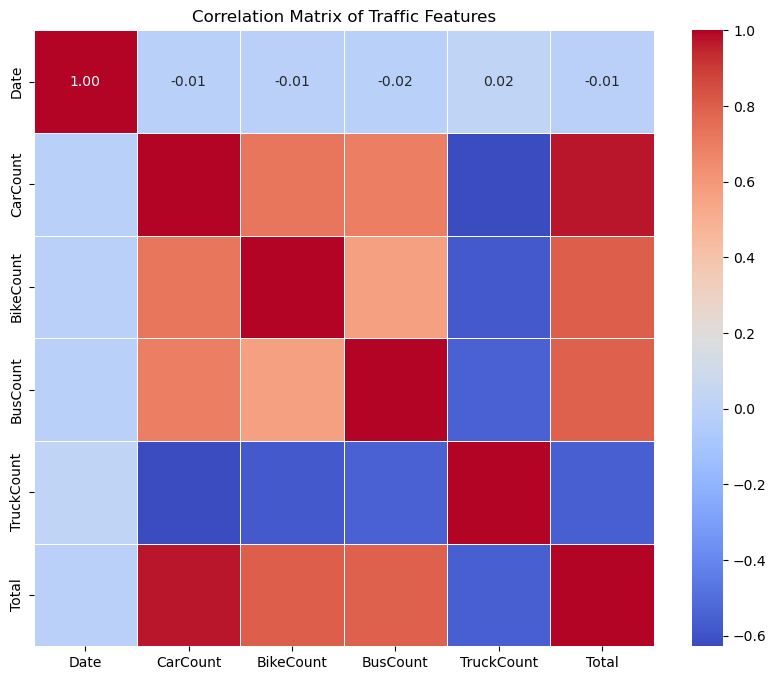

In [27]:
# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['number']).columns
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Traffic Features')
plt.show()


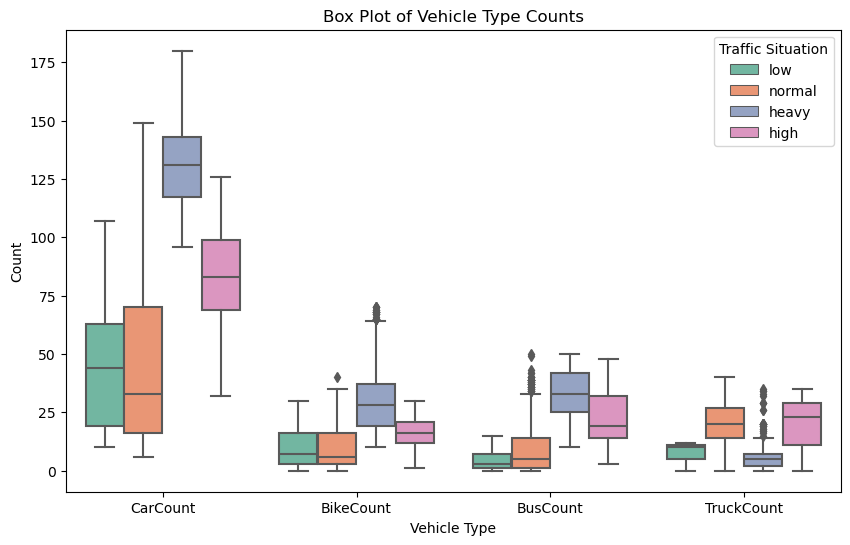

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', and 'Traffic Situation'
# Melt the DataFrame to create 'df_melt'
df_melt = pd.melt(df, id_vars=['Traffic Situation'], value_vars=['CarCount', 'BikeCount', 'BusCount', 'TruckCount'])

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', hue='Traffic Situation', data=df_melt, palette='Set2')
plt.title('Box Plot of Vehicle Type Counts')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()


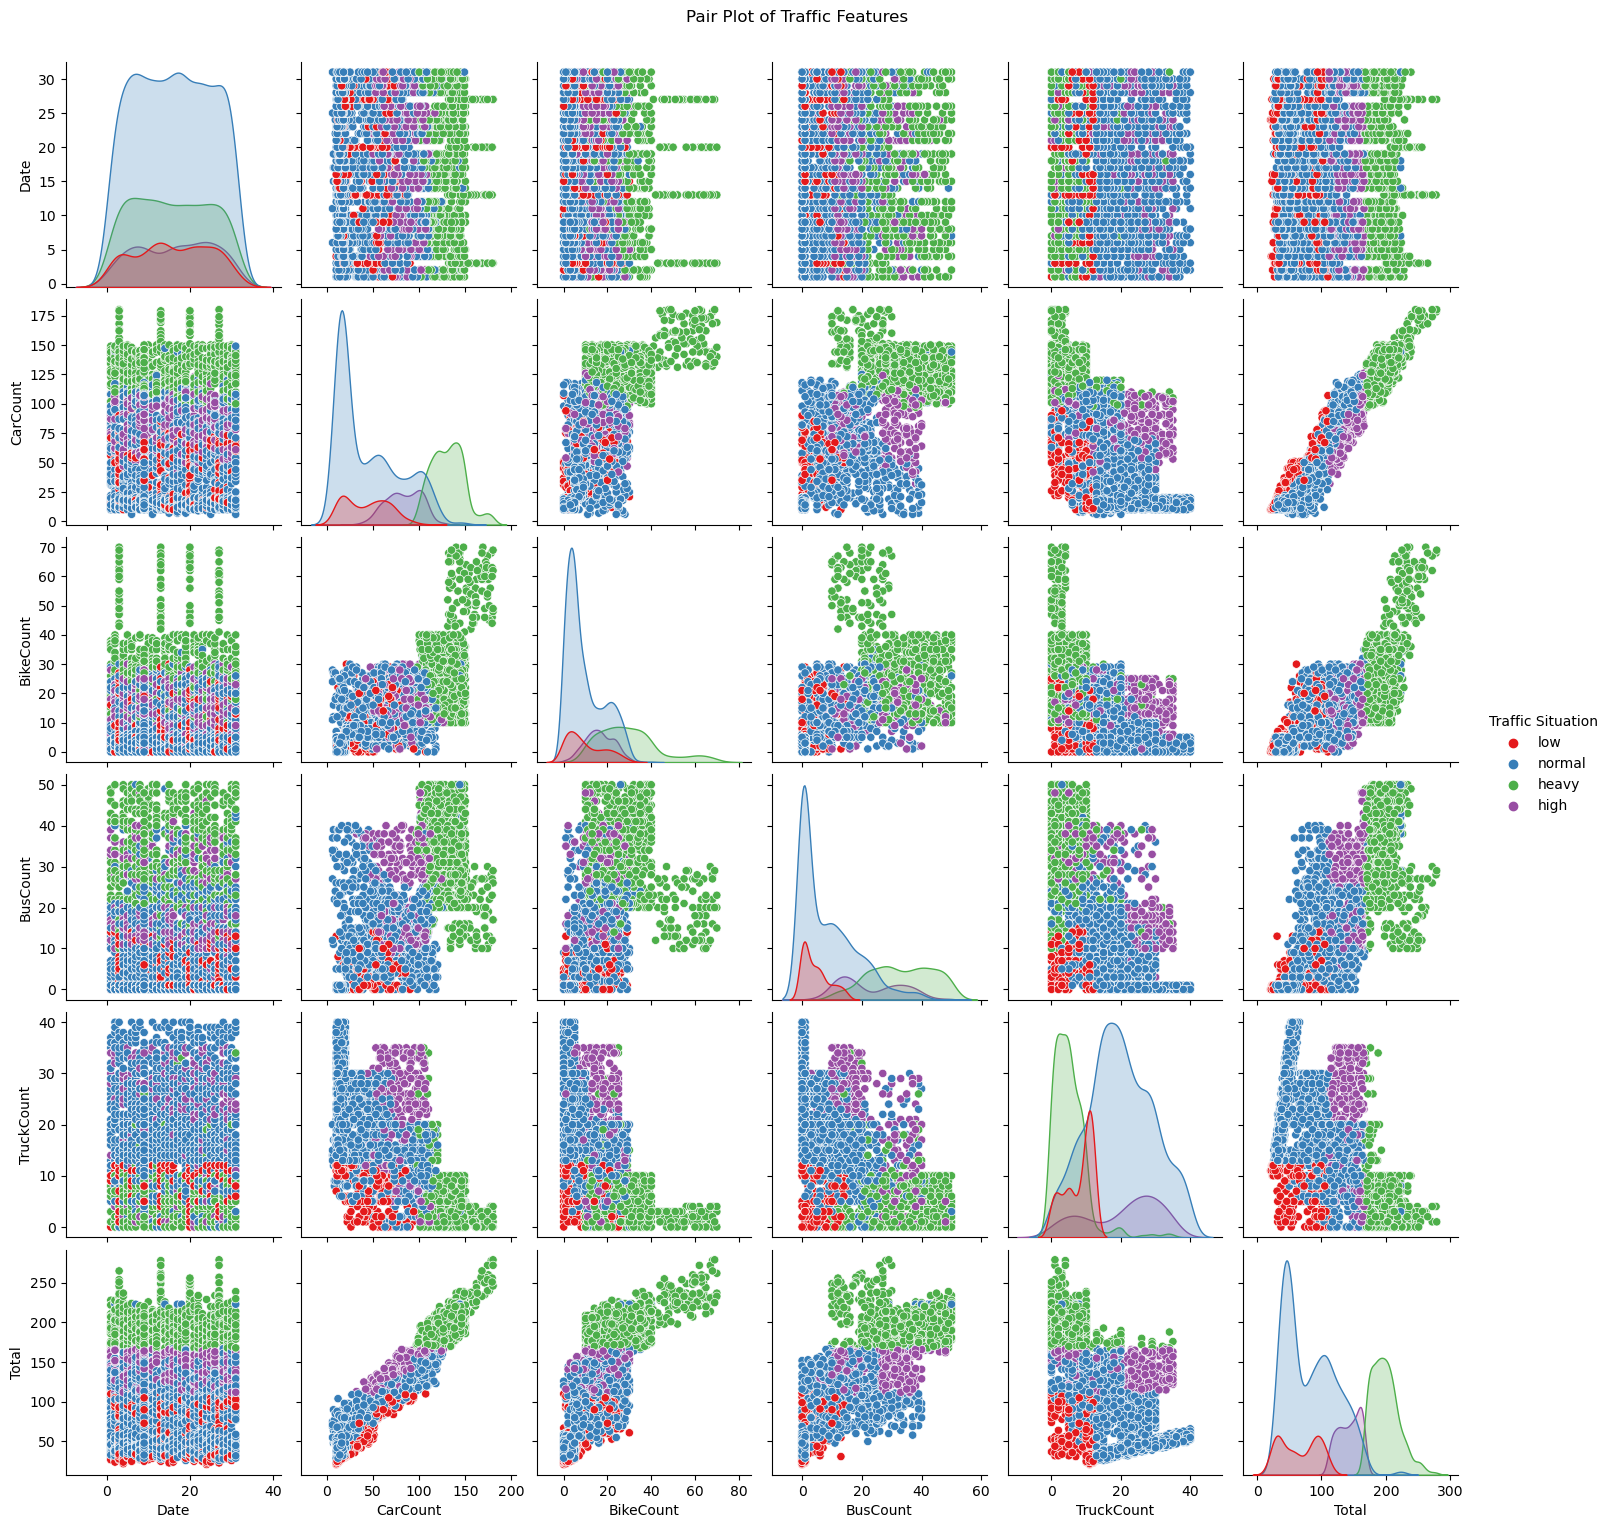

In [30]:
sns.pairplot(df, hue='Traffic Situation', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot of Traffic Features', y=1.02)
plt.show()


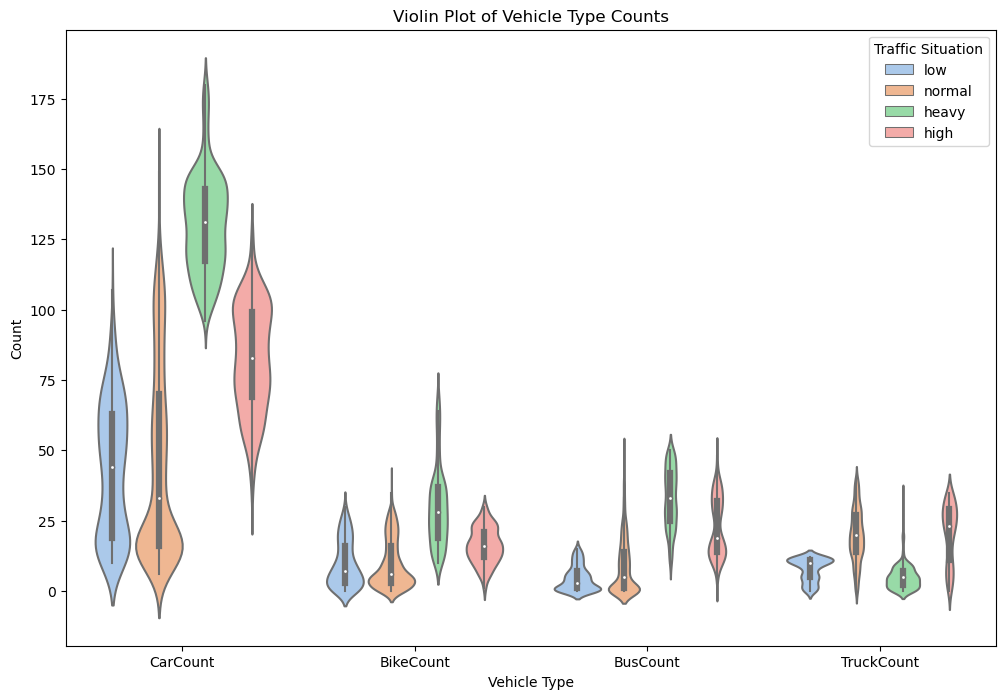

In [32]:
# Assuming you have columns 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', and 'Traffic Situation'
# Melt the DataFrame to create 'df_melt'
df_melt = pd.melt(df, id_vars=['Traffic Situation'], value_vars=['CarCount', 'BikeCount', 'BusCount', 'TruckCount'])

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='variable', y='value', hue='Traffic Situation', data=df_melt, palette='pastel')
plt.title('Violin Plot of Vehicle Type Counts')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()


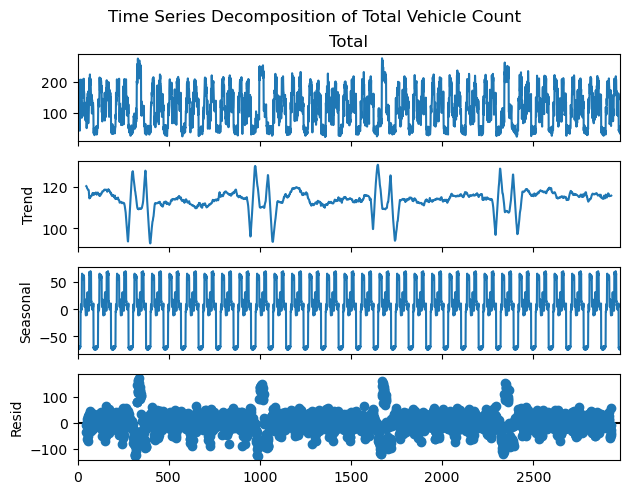

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' has a datetime index
result = seasonal_decompose(df['Total'], model='additive', period=96)
result.plot()
plt.suptitle('Time Series Decomposition of Total Vehicle Count', y=1.02)
plt.show()


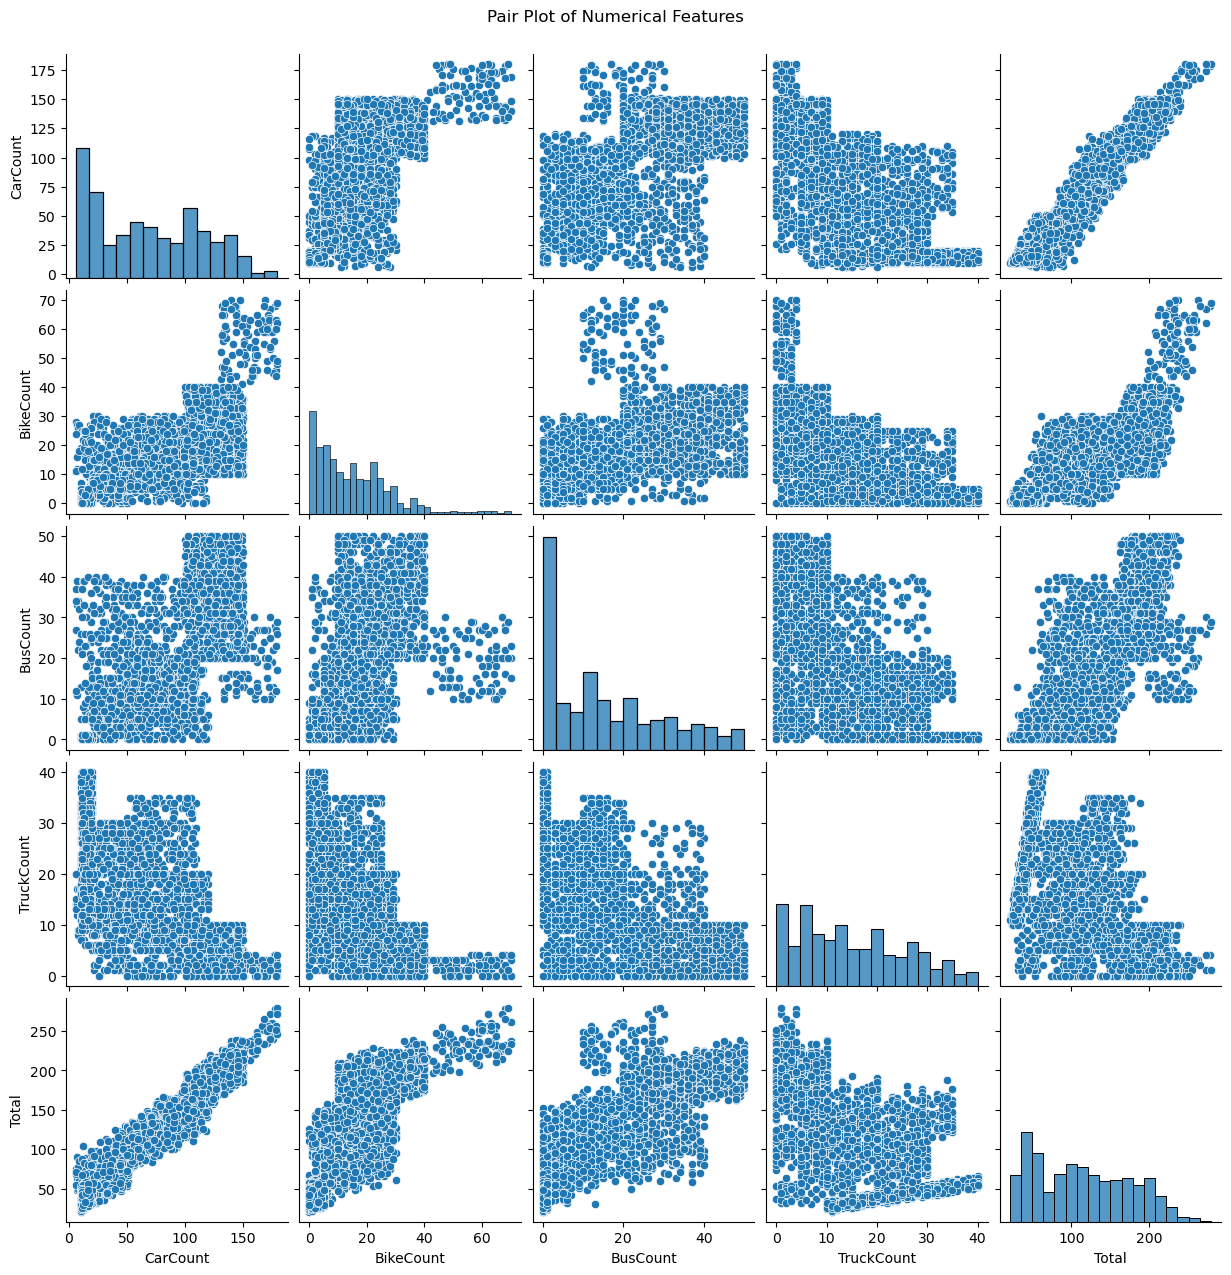

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numerical columns
numerical_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

# Assuming 'df' is your DataFrame
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()
